# Ramanujan’s Formula for π

Srinivasa Ramanujan, a self-taught Indian mathematician, developed groundbreaking series for π between 1910 and 1914. Working with minimal resources, his formulas astonished mathematicians by converging at an unprecedented rate, adding approximately **8 decimal digits per term**. These discoveries influenced modern computational methods, notably the **Chudnovsky algorithm**, which computes billions of digits of π.

<div style="text-align: center"><b>Ramanujan's most famous series is:</b></div>

$$
\frac{1}{\pi} = \frac{2\sqrt{2}}{9801} \sum_{k=0}^{\infty} \frac{(4k)! (1103 + 26390k)}{(k!)^4 396^{4k}}
$$

### Key Features
- **Rapid Convergence**: A single term approximates π to 8 decimal places; by five terms, the error is less than \(10^{-30}\).
- **Structure**: The series combines large factorials \((4k)!\), a linear term \(1103 + 26390k\), and a rapidly growing denominator \(396^{4k}\).
- **Legacy**: This formula inspired the Chudnovsky brothers’ series, which achieves ~14 digits per term, as we’ll explore later.

In this notebook, we’ll compute partial sums, quantify the error, and visualize the convergence to showcase Ramanujan’s genius.

![Srinivasa Ramanujan](../images/Ramanujan.png)
*AI Generated Portrait of Srinivasa Ramanujan, whose intuitive brilliance revolutionized number theory.*

In [26]:
from mpmath import mp, factorial, sqrt
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown, display
import pandas as pd
mp.dps = 50

In [27]:
from mpmath import mp, factorial, sqrt

def ramanujan_pi(terms=1):
    """Compute an approximation of π using Ramanujan's formula.
    
    Args:
        terms (int): Number of terms in the series (default=1).
    
    Returns:
        mp.mpf: Approximation of π.
    """
    if terms < 0:
        raise ValueError("Number of terms must be non-negative")
    total = mp.mpf(0)
    for k in range(terms):
        num = factorial(4 * k) * (1103 + 26390 * k)
        den = (factorial(k) ** 4) * (mp.power(396, 4 * k))
        total += num / den
    pi_inv = (2 * sqrt(2) / 9801) * total
    return 1 / pi_inv

# Compute and store results with errors
print("Approximations of π using Ramanujan's series:")
results = []
for n in range(1, 6):
    pi_approx = ramanujan_pi(n)
    error = abs(mp.pi - pi_approx)
    results.append((n, pi_approx, error))
    # Use mp.nstr for precise formatting
    print(f"After {n} term(s): π ≈ {mp.nstr(pi_approx, 15)}, Error: {mp.nstr(error, n=15, min_fixed=0, max_fixed=0)}")

Approximations of π using Ramanujan's series:
After 1 term(s): π ≈ 3.14159273001331, Error: 7.64235124218514e-8
After 2 term(s): π ≈ 3.14159265358979, Error: 6.39536262443027e-16
After 3 term(s): π ≈ 3.14159265358979, Error: 5.68242325601396e-24
After 4 term(s): π ≈ 3.14159265358979, Error: 5.2388962804811e-32
After 5 term(s): π ≈ 3.14159265358979, Error: 4.94418757924915e-40


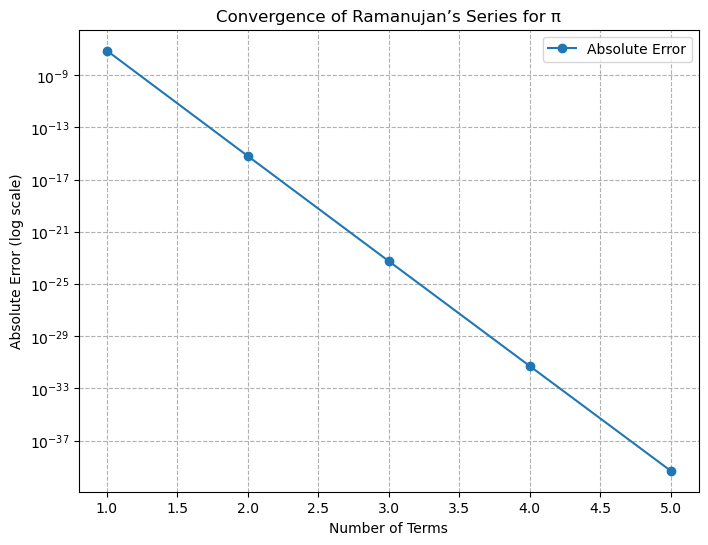

In [28]:
terms = [r[0] for r in results]
errors = [float(r[2]) for r in results]
plt.figure(figsize=(8, 6))
plt.semilogy(terms, errors, marker='o', linestyle='-', color='#1f77b4', label='Absolute Error')
plt.xlabel('Number of Terms')
plt.ylabel('Absolute Error (log scale)')
plt.title("Convergence of Ramanujan’s Series for π")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [29]:
from IPython.display import Markdown, display
import pandas as pd

# Generate results table with enhanced formatting
try:
    # Check if results exists and is non-empty
    if 'results' not in globals() or not results:
        raise ValueError("Results list is empty. Run Cell 3 to compute approximations.")
    
    # Create markdown table with fixed-width formatting
    table = "| Terms | Approximation of π    | Absolute Error |\n"
    table += "|-------|----------------------|----------------|\n"
    for n, pi_approx, error in results:
        pi_str = mp.nstr(pi_approx, 15).rjust(18)  # Right-align, 15 decimals
        error_str = mp.nstr(error, n=2, min_fixed=0, max_fixed=0).rjust(14)  # 2 significant digits
        table += f"| {n:<5} | {pi_str} | {error_str} |\n"
    
    # Display table
    display(Markdown(table))
    
    # Save results for Chudnovsky comparison
    df = pd.DataFrame({
        'Series': ['Ramanujan'] * len(results),
        'Terms': [r[0] for r in results],
        'Approximation': [float(r[1]) for r in results],  # Convert mpmath.mpf to float
        'Error': [float(r[2]) for r in results]
    })
    df.to_csv('ramanujan_results.csv', index=False)
    print("Results saved to 'ramanujan_results.csv' for Chudnovsky comparison.")

except NameError as e:
    print(f"Error: '{str(e).split('name ')[1].split(' is')[0]}' not defined. Please run Cell 2 and Cell 3 first.")
except ImportError:
    print("Error: Required libraries (e.g., mpmath, pandas) not installed. Install with: pip install mpmath pandas")
except Exception as e:
    print(f"Error generating table: {str(e)}")

| Terms | Approximation of π    | Absolute Error |
|-------|----------------------|----------------|
| 1     |   3.14159273001331 |         7.6e-8 |
| 2     |   3.14159265358979 |        6.4e-16 |
| 3     |   3.14159265358979 |        5.7e-24 |
| 4     |   3.14159265358979 |        5.2e-32 |
| 5     |   3.14159265358979 |        4.9e-40 |


Results saved to 'ramanujan_results.csv' for Chudnovsky comparison.


### Discussion
The table above shows Ramanujan’s series achieving:
$$ 
\pi \approx 3.1415927300
 $$
with **8 decimal places** after one term (error ~$$ 7.6 \times 10^{-8} $$). By the fifth term, the error drops below $$ 10^{-30} $$, far surpassing classical series like Leibniz’s ($$ \frac{\pi}{4} = \sum_{k=0}^{\infty} \frac{(-1)^k}{2k+1} $$).

The series’ efficiency comes from large factorials $$ (4k)! $$ and the denominator $$ 396^{4k} $$. This inspired the Chudnovsky algorithm (~14 digits per term), which we’ll compare later.

**Applications**: High-precision π calculations are critical in numerical analysis, cryptography, and physics simulations.

*Fun Fact*: Ramanujan derived this series using only a chalkboard!

In [30]:
@interact(terms=(1, 10))
def show_pi_approx(terms):
    pi_approx = ramanujan_pi(terms)
    error = abs(mp.pi - pi_approx)
    print(f"After {terms} term(s): π ≈ {mp.nstr(pi_approx, 15)}, Error: {mp.nstr(error, n=2, min_fixed=0, max_fixed=0)}")

interactive(children=(IntSlider(value=5, description='terms', max=10, min=1), Output()), _dom_classes=('widget…

In [31]:
def chudnovsky_pi(terms=1):
    total = mp.mpf(0)
    C = 426880 * mp.sqrt(10005)
    for k in range(terms):
        num = factorial(6 * k) * (13591409 + 545140134 * k)
        den = (factorial(k) ** 3) * factorial(3 * k) * (mp.power(640320, 3 * k + 1.5))
        total += ((-1) ** k) * num / den
    return C / (12 * total)

print("Teaser: Chudnovsky series (1 term):")
pi_approx = chudnovsky_pi(1)
print(f"π ≈ {mp.nstr(pi_approx, 15)}, Error: {mp.nstr(abs(mp.pi - pi_approx), n=2, min_fixed=0, max_fixed=0)}")

Teaser: Chudnovsky series (1 term):
π ≈ 134141830.0834, Error: 1.3e+8
